Brayan Estiven Salcedo Suarez 202022731- Estudiante 2 y 3
Julian Parra 202013033- Estudiante 1

### Descripción del entendimiento de datos
El conjunto de datos proviene del análisis del comportamiento financiero de los clientes de una empresa emisorade tarjetas de crédito y contiene información sobre sus saldos, límites de crédito, entre otros. Cada fila representa un cliente y sus caracterisitcas especificas, permitiendo la identificación de patrones y segmentación en función de su comportamiento de gasto en centros comerciales.

Los atributos se peuden clasificar en las siguientes categorias:

- **Datos financieros**
- SALDO: saldo actual en la cuenta del cliente
- LÍMITE_CREDITO: límite máximo de crédito asigando
- PAGOS: monto toal de pagos realizados
- PAGOS_MINIMOS: Monto de pagos minimos realizados
- **Comportamiento de compra**
- COMPRAS
- COMPRAS_PUNTUALES
- COMPRAS_PLAZOS
- AVANCE_EFECTIVO
- **Frecuencia de actividades**
- F_SALDO
- F_COMPRAS
- F_COMPRAS_PUNTUALES
- F_COMPRAS_PLAZOS
- F_AVANCE_EFECTIVO
- F_PAGOS_COMPLETOS

### Carga de librerias necesarias para implementación

In [87]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

### Cargar los datos

In [88]:
df = pd.read_csv('./202510_Laboratorio 2 - Agrupación_Customer_Data.csv', sep=';', encoding = "ISO-8859-1")

### Entendimiento de los datos

Se obtiene la cantidad de filas y columnas del dataset con df.shape, lo que indica que hay 8950 registros y 18 atributos.

In [89]:
df.shape

(8950, 18)

Luego, con df.head(), se visualizan las primeras 5 filas del dataset para entender mejor su estructura.

In [90]:
df.head()

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
2,C10003,4305.572068,0.176531,28392.95334,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72,81,15515.58621,27111.360490,NaN,0.829074,6
3,C10004,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
4,C10005,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.70507,6994.688474,62041.61734,0.383186,10


En primer lugar, realizamos una verificación de las columnas del dataset de acuerdo al diccionario de datos suministrado se observa como los tipos de datos de las variables son acordes de acuerdo a lo esperado.

# **Tipo de analítica y tipo de aprendizaje**

La tarea de clustering corresponde a analítica descriptiva, ya que busca identificar patrones en los datos sin realizar predicciones explícitas.
Se emplea un enfoque de aprendizaje no supervisado, dado que no se cuenta con etiquetas de clase predefinidas.

## **Análisis de la estructura del DataFrame**

Se utiliza df.info() para obtener información sobre las columnas, tipos de datos y posibles valores nulos.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8950 non-null   object 
 1   SALDO                8950 non-null   float64
 2   F_SALDO              8950 non-null   float64
 3   COMPRAS              8950 non-null   float64
 4   COMPRAS_PUNTUALES    8950 non-null   float64
 5   COMPRAS_PLAZOS       8950 non-null   float64
 6   AVANCE_EFECTIVO      8950 non-null   float64
 7   F_COMPRAS            8950 non-null   float64
 8   F_COMPRAS_PUNTUALES  8950 non-null   float64
 9   F_COMPRAS_PLAZOS     8950 non-null   float64
 10  F_AVANCE_EFECTIVO    8950 non-null   float64
 11  P_AVANCE_EFECTIVO    8950 non-null   int64  
 12  P_COMPRAS            8950 non-null   int64  
 13  LÍMITE_CREDITO       8949 non-null   float64
 14  PAGOS                8950 non-null   float64
 15  PAGOS_MINIMOS        8637 non-null   f

Después, se genera un resumen estadístico de las variables numéricas con df.describe(), lo que permite identificar el rango de valores, promedios y distribución de los datos.

In [92]:
df.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,9382.387900,0.459205,30525.873439,22913.665720,11407.851805,22573.474202,0.559810,0.478032,0.623916,0.734946,76.169162,164.981453,14696.640361,19824.347218,44222.977795,0.545414,8.370615
std,5118.113559,0.282998,11041.410943,13573.919086,7087.102996,12594.295895,0.214055,0.221873,0.208207,0.422563,22.260935,71.322003,5537.074673,11069.268177,15468.314241,0.267443,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4275.036859,0.188490,27106.651598,6698.252490,3736.720194,10944.431108,0.407273,0.250856,0.518231,0.230716,65.000000,97.000000,13487.727310,9329.603116,31572.127680,0.336732,7.000000
50%,12007.718810,0.306650,30934.582275,31011.033490,10832.141085,19465.792260,0.505305,0.533521,0.607608,0.947651,82.000000,176.000000,14942.545350,21367.621275,48780.271750,0.432690,8.000000
75%,13740.565878,0.756061,39825.160795,34495.416422,19127.083038,36150.722568,0.777084,0.649120,0.814929,1.029172,92.000000,216.000000,16269.727120,25219.127372,57761.175980,0.815178,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


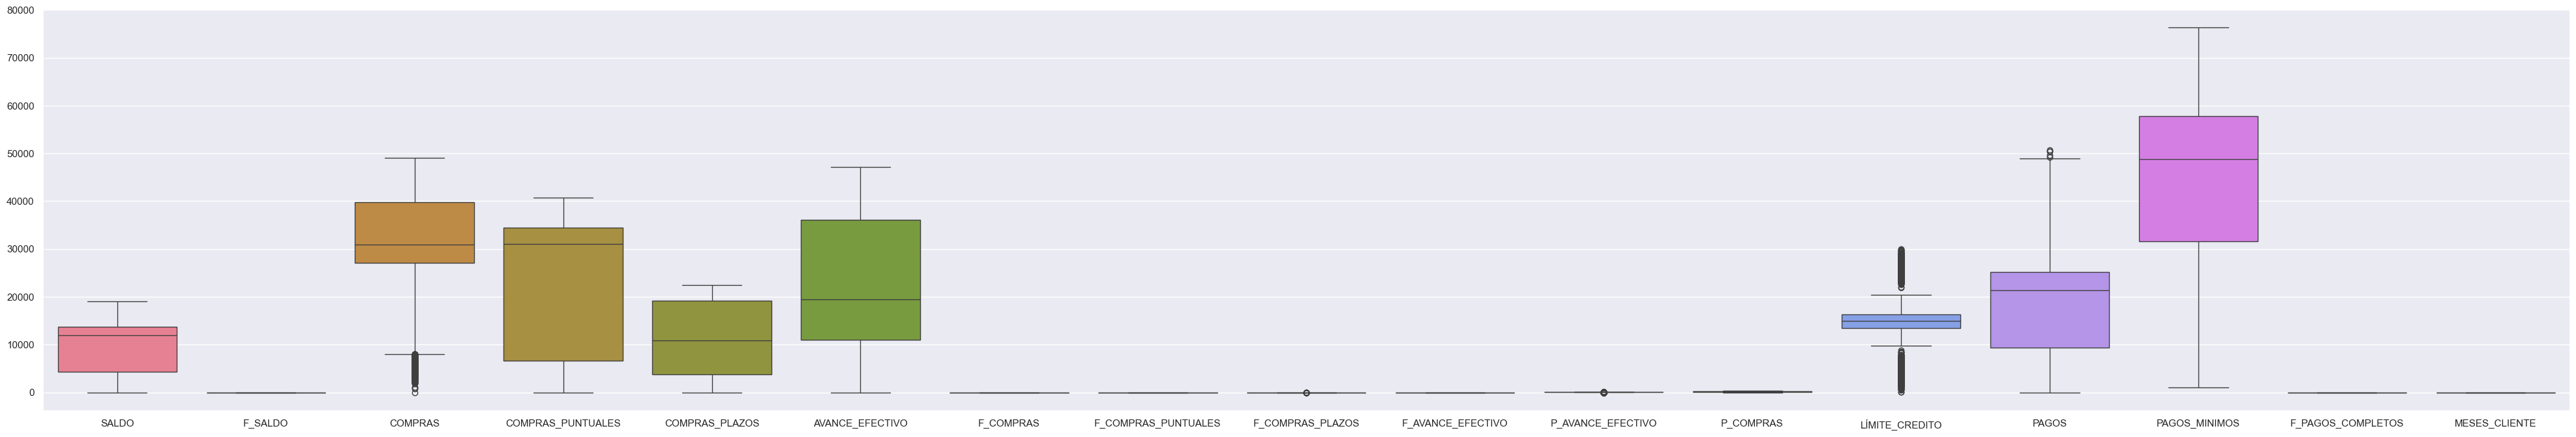

In [93]:
fig = plt.figure(figsize=(50,8))
ax = sns.boxplot(data = df, orient ="v")

Para poder ver las variables con dominios similares para entenderlas mejor. En este caso se va a normalizar los datos numericos para comparar mejor. Pero antes se elimina las variables categoricas como ID.

La variable ID se elimina porque no aporta información relevante para el análisis. Dado que K-Means se basa en la distancia entre puntos, incluir una variable arbitraria como un identificador único podría generar ruido en la segmentación. Posteriormente, se aplica la técnica MinMaxScaler para escalar los valores numéricos en un rango de 0 a 1.
Esto se hace porque algunos algoritmos de aprendizaje automático requieren que los datos estén en una escala uniforme para funcionar correctamente.

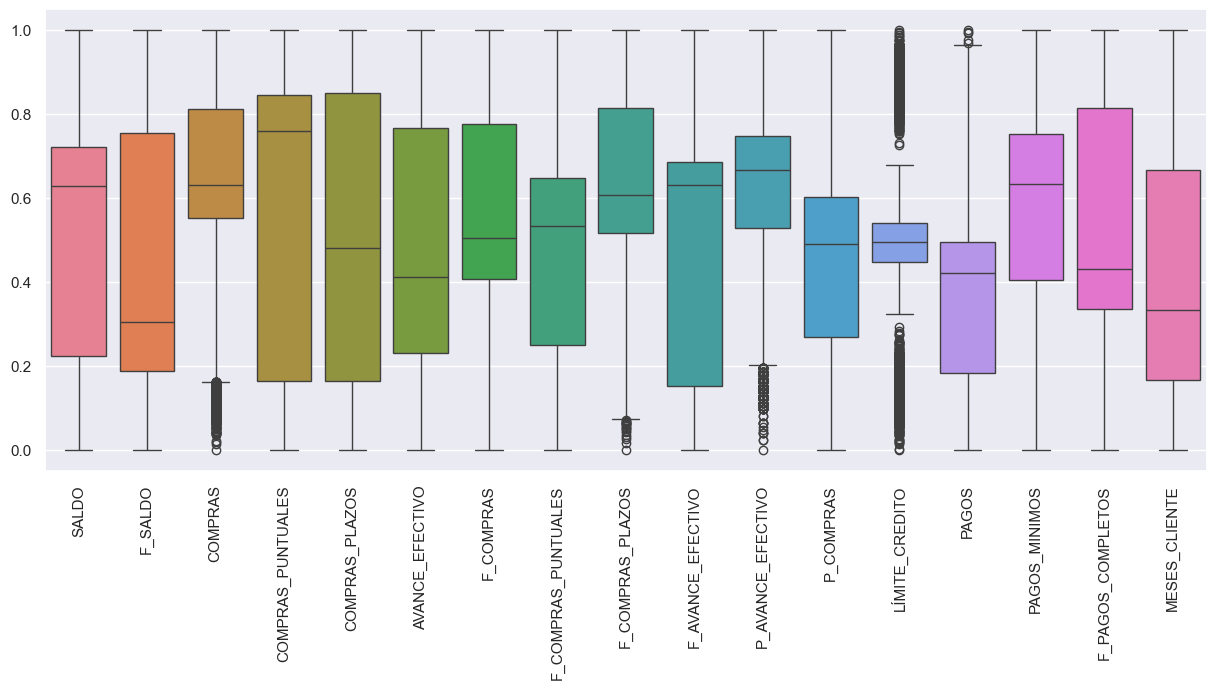

In [94]:
from sklearn.preprocessing import MinMaxScaler

df_copy = df.drop(columns=['ID'])

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_copy.columns)

plt.figure(figsize=(15,6))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=90)
plt.show()

## **Visualización de datos normalizados**
Después de la normalización, se generan nuevos boxplots para verificar que los datos han sido correctamente escalados.

In [95]:

print("Media después de la normalización:\n", df_scaled.mean())
print("Desviación estándar después de la normalización:\n", df_scaled.std())


Media después de la normalización:
 SALDO                  0.492691
F_SALDO                0.459205
COMPRAS                0.622474
COMPRAS_PUNTUALES      0.562143
COMPRAS_PLAZOS         0.507016
AVANCE_EFECTIVO        0.478889
F_COMPRAS              0.559810
F_COMPRAS_PUNTUALES    0.478032
F_COMPRAS_PLAZOS       0.623916
F_AVANCE_EFECTIVO      0.489964
P_AVANCE_EFECTIVO      0.619261
P_COMPRAS              0.460842
LÍMITE_CREDITO         0.489036
PAGOS                  0.390847
PAGOS_MINIMOS          0.573168
F_PAGOS_COMPLETOS      0.545414
MESES_CLIENTE          0.395102
dtype: float64
Desviación estándar después de la normalización:
 SALDO                  0.268764
F_SALDO                0.282998
COMPRAS                0.225153
COMPRAS_PUNTUALES      0.333010
COMPRAS_PLAZOS         0.314982
AVANCE_EFECTIVO        0.267184
F_COMPRAS              0.214055
F_COMPRAS_PUNTUALES    0.221873
F_COMPRAS_PLAZOS       0.208207
F_AVANCE_EFECTIVO      0.281708
P_AVANCE_EFECTIVO      0.180983
P_C

Se identifican las variables de tipo float y de tipo entero por separado.
Luego, se generan gráficos de caja específicos para cada uno de estos tipos de datos con el fin de analizar su distribución.

In [96]:
name_cols_float = df_copy.select_dtypes(include = ['float']).columns
name_cols_int = df_copy.select_dtypes(include = ['int64']).columns
name_cols_int

Index(['P_AVANCE_EFECTIVO', 'P_COMPRAS', 'MESES_CLIENTE'], dtype='object')

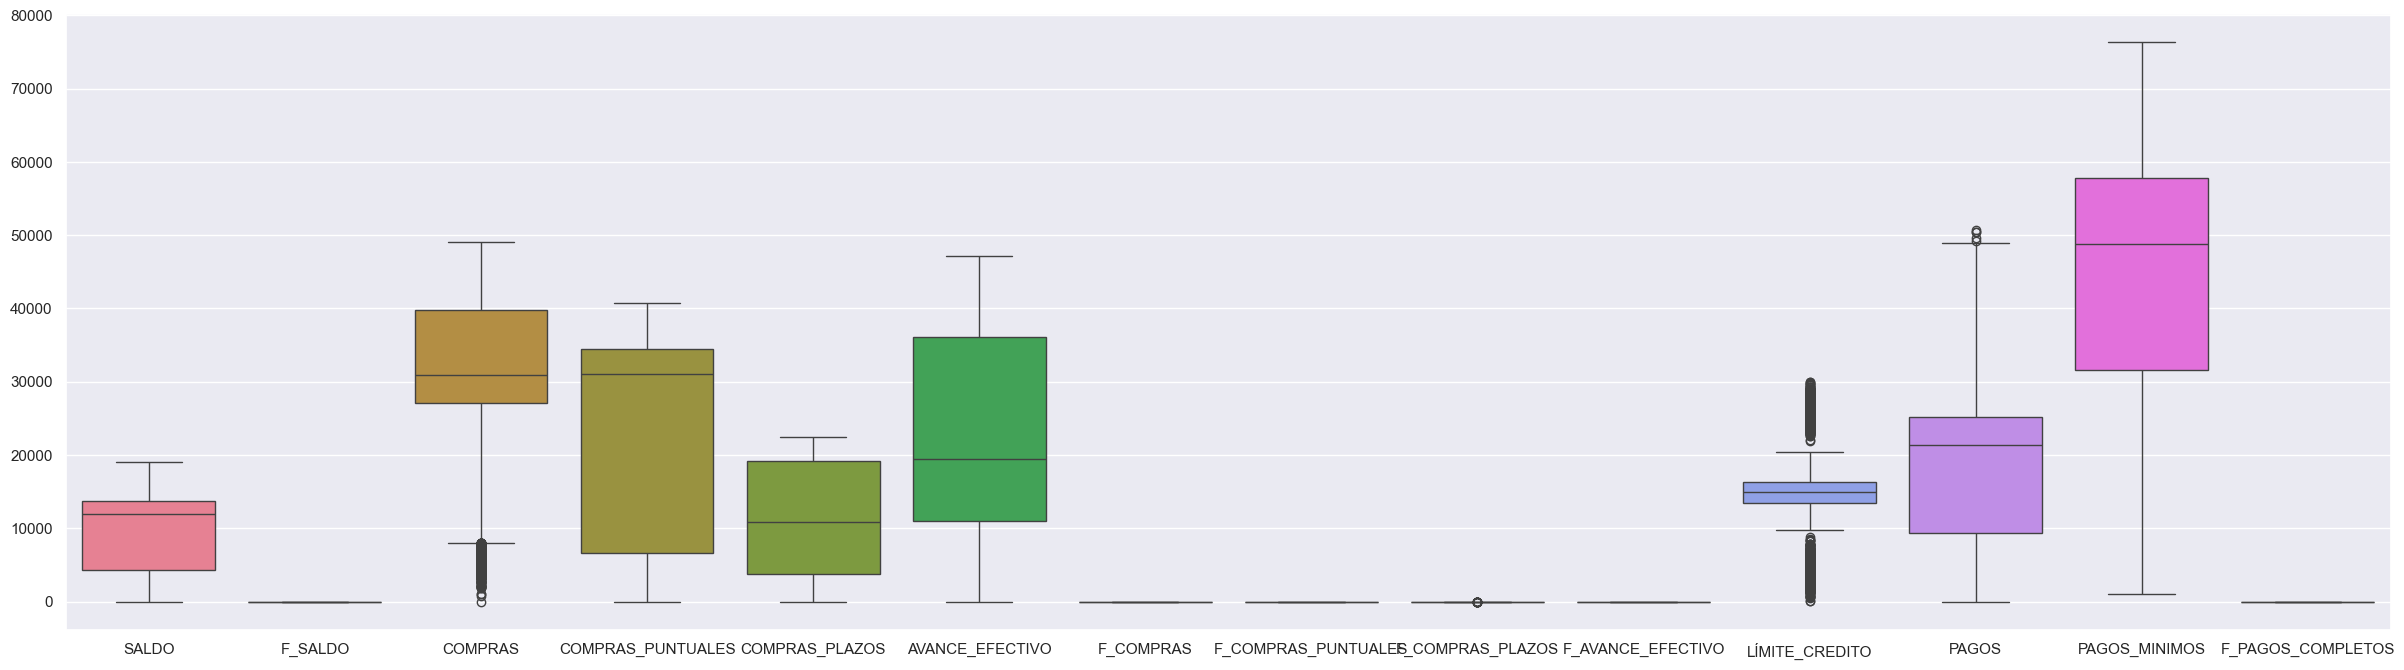

In [97]:
fig=plt.figure(figsize=(30,8))
ax = sns.boxplot(data=df_copy[name_cols_float], orient="v")

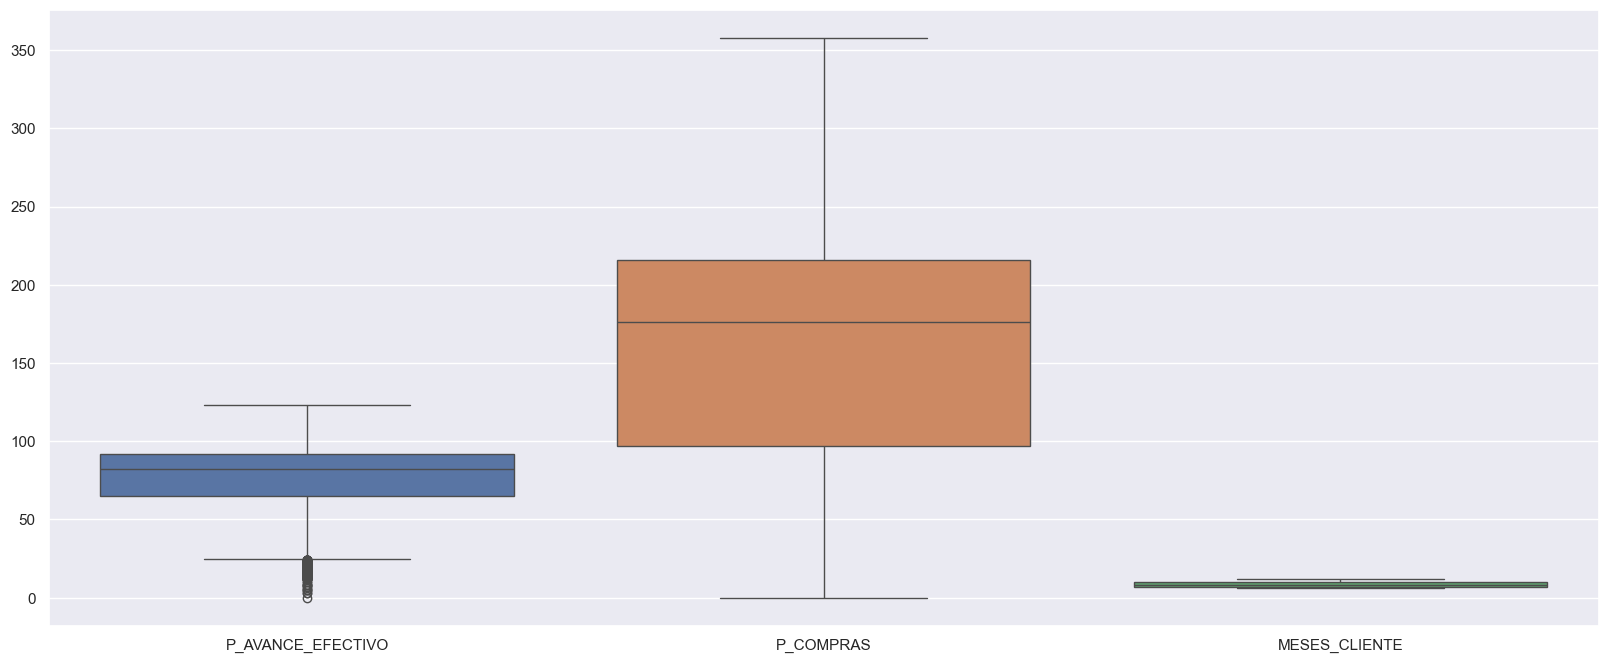

In [98]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_copy[name_cols_int], orient="v")

Ahora vamos a observar las variables que no son númericas

In [99]:
name_cols_non_number = df.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['ID'], dtype='object')

In [100]:
df[name_cols_non_number].describe()

,ID
count,8950
unique,8950
top,C18950
freq,1


Así mismo, se generó un pairplot con las variables PAGOS_MINIMOS y PAGOS del conjunto de datos. El pairplot es una visualización que permite analizar tanto la distribución univariada de cada variable como la relación entre ellas. En dicha grafica se observa que ambas variables tienen distribuciones multimodales, lo que sugiere la existencia de distintos segmentos de clientes con diferentes comportamientos de pago. PAGOS_MINIMOS muestra dos picos bien diferenciados, indicando la posible presencia de clientes que realizan pagos mínimos bajos y otro grupo que realiza pagos mínimos elevados. Por otro lado, PAGOS exhibe una distribución con múltiples picos, lo que sugiere que los pagos pueden estar influenciados por límites de crédito, políticas de pago o patrones de consumo. En cuanto a la relación bivariada, los gráficos de dispersión muestran agrupaciones claras en los datos, sugiriendo que los clientes pueden segmentarse según su comportamiento de pago. Se evidencia una relación negativa entre PAGOS_MINIMOS y PAGOS, es decir, aquellos clientes que hacen pagos mínimos más altos tienden a realizar pagos totales más bajos y viceversa. La presencia de grupos bien definidos respalda la validez del análisis de clustering previo y refuerza la idea de que los clientes pueden dividirse en distintos segmentos según sus hábitos de pago. En conclusión, los clientes parecen adoptar estrategias de pago diferenciadas: algunos priorizan pagos mínimos altos, mientras que otros optan por pagos completos. La existencia de distribuciones multimodales en ambas variables indica diferentes patrones de financiamiento, posiblemente influenciados por factores como el límite de crédito, el acceso a financiamiento o el nivel de endeudamiento. 









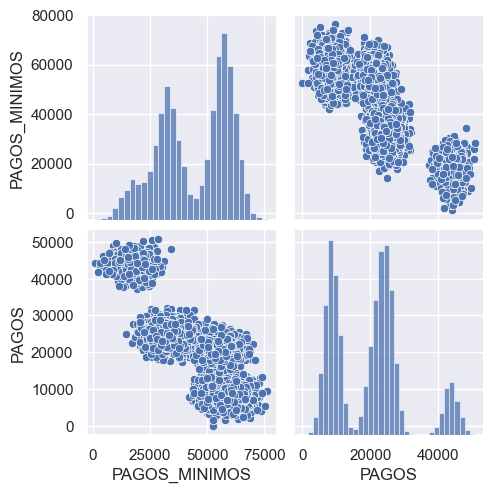

In [101]:
df_pagos = df[['PAGOS_MINIMOS', 'PAGOS']]
sns.pairplot(df_pagos)
plt.show()

#### Análisis
- La variable categorica ID no es necesaria para analizar, debido a que es la identificación única que tiene cada cliente.
- Se evidencia que hay patrones de agrupación en islas, lo que sugiere que existen diferentes grupos o categorias en los datos.

### Limpieza de los datos

#### Completitud

En primer lugar, respecto a la calidad de los datos es necesario revisar los valores nulos dentro del dataset.

In [102]:
((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)

PAGOS_MINIMOS          0.034972
LÍMITE_CREDITO         0.000112
SALDO                  0.000000
ID                     0.000000
F_SALDO                0.000000
COMPRAS                0.000000
AVANCE_EFECTIVO        0.000000
F_COMPRAS              0.000000
COMPRAS_PUNTUALES      0.000000
COMPRAS_PLAZOS         0.000000
F_COMPRAS_PLAZOS       0.000000
F_COMPRAS_PUNTUALES    0.000000
P_AVANCE_EFECTIVO      0.000000
F_AVANCE_EFECTIVO      0.000000
P_COMPRAS              0.000000
PAGOS                  0.000000
F_PAGOS_COMPLETOS      0.000000
MESES_CLIENTE          0.000000
dtype: float64

Se observa que PAGOS_MINIMOS cuenta con un porcentaje del 0.034972 de datos nulos y LIMITE_CREDITO cuenta con un porcentaje de 0.000112 asi que se decidió remplazar por la media de PAGOS_MINIMOS y de LIMITE_CREDITO.

In [103]:
df['PAGOS_MINIMOS'].fillna(df['PAGOS_MINIMOS'].mean(), inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\7332186.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PAGOS_MINIMOS'].fillna(df['PAGOS_MINIMOS'].mean(), inplace=True)


Se generó un histograma para analizar la distribución de la variable `PAGOS_MINIMOS` antes de imputar valores nulos. Para complementar la visualización, se incluyó una estimación de densidad de kernel (KDE), lo que permite observar mejor la forma de la distribución. Esto es útil para identificar la presencia de valores atípicos, sesgos o patrones en los datos, lo que facilita la toma de decisiones sobre cómo manejar los valores faltantes de manera adecuada.

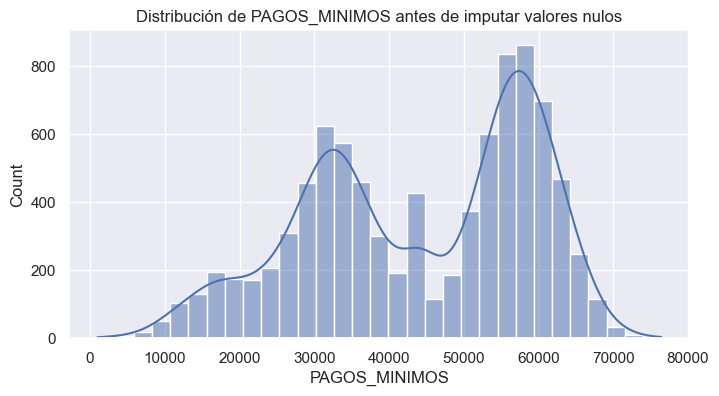

In [104]:
plt.figure(figsize=(8,4))
sns.histplot(df['PAGOS_MINIMOS'], kde=True)
plt.title('Distribución de PAGOS_MINIMOS antes de imputar valores nulos')
plt.show()


Se opta por reemplazar los valores nulos con la media porque la variable PAGOS_MINIMOS sigue una distribución aproximadamente normal. 

In [105]:
df['LÍMITE_CREDITO'].fillna(df['LÍMITE_CREDITO'].mean(), inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\871973506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LÍMITE_CREDITO'].fillna(df['LÍMITE_CREDITO'].mean(), inplace=True)


Posterior al relleno de los valores nulos verificamos que el dataset ya no tenga valores nulos.

In [106]:
((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)

ID                     0.0
SALDO                  0.0
F_SALDO                0.0
COMPRAS                0.0
COMPRAS_PUNTUALES      0.0
COMPRAS_PLAZOS         0.0
AVANCE_EFECTIVO        0.0
F_COMPRAS              0.0
F_COMPRAS_PUNTUALES    0.0
F_COMPRAS_PLAZOS       0.0
F_AVANCE_EFECTIVO      0.0
P_AVANCE_EFECTIVO      0.0
P_COMPRAS              0.0
LÍMITE_CREDITO         0.0
PAGOS                  0.0
PAGOS_MINIMOS          0.0
F_PAGOS_COMPLETOS      0.0
MESES_CLIENTE          0.0
dtype: float64

#### Unicidad

En segundo lugar, veremos si no hay valores duplicados dentro del dataset.

In [107]:
df.duplicated(keep = False).sum()

np.int64(0)

Despues de verificar mediante la función duplicated observamos que no hay valores duplicados dentro del dataset con lo cual se prosigue con lo siguiente.

#### Consistencia

El DataFrame tiene 8950 registros sin valores nulos, con tipos de datos adecuados según el diccionario. ID es un identificador (object), las variables financieras son float64 y los contadores son int64, lo que es coherente. No hay inconsistencias estructurales ni problemas de formato.

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8950 non-null   object 
 1   SALDO                8950 non-null   float64
 2   F_SALDO              8950 non-null   float64
 3   COMPRAS              8950 non-null   float64
 4   COMPRAS_PUNTUALES    8950 non-null   float64
 5   COMPRAS_PLAZOS       8950 non-null   float64
 6   AVANCE_EFECTIVO      8950 non-null   float64
 7   F_COMPRAS            8950 non-null   float64
 8   F_COMPRAS_PUNTUALES  8950 non-null   float64
 9   F_COMPRAS_PLAZOS     8950 non-null   float64
 10  F_AVANCE_EFECTIVO    8950 non-null   float64
 11  P_AVANCE_EFECTIVO    8950 non-null   int64  
 12  P_COMPRAS            8950 non-null   int64  
 13  LÍMITE_CREDITO       8950 non-null   float64
 14  PAGOS                8950 non-null   float64
 15  PAGOS_MINIMOS        8950 non-null   f

#### Validez

Las variables de frecuencia (F_SALDO, F_COMPRAS, etc.) deben estar entre 0 y 1, y los montos financieros deben ser positivos lo cual se cumple. En adición no se presentan valores negativos lo cual es bueno.

In [109]:
df.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,9382.387900,0.459205,30525.873439,22913.665720,11407.851805,22573.474202,0.559810,0.478032,0.623916,0.734946,76.169162,164.981453,14696.640361,19824.347218,44222.977795,0.545414,8.370615
std,5118.113559,0.282998,11041.410943,13573.919086,7087.102996,12594.295895,0.214055,0.221873,0.208207,0.422563,22.260935,71.322003,5536.765296,11069.268177,15195.396929,0.267443,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4275.036859,0.188490,27106.651598,6698.252490,3736.720194,10944.431108,0.407273,0.250856,0.518231,0.230716,65.000000,97.000000,13487.851473,9329.603116,31852.988945,0.336732,7.000000
50%,12007.718810,0.306650,30934.582275,31011.033490,10832.141085,19465.792260,0.505305,0.533521,0.607608,0.947651,82.000000,176.000000,14942.326700,21367.621275,46696.585380,0.432690,8.000000
75%,13740.565878,0.756061,39825.160795,34495.416422,19127.083038,36150.722568,0.777084,0.649120,0.814929,1.029172,92.000000,216.000000,16269.513232,25219.127372,57527.279113,0.815178,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Construcción modelo



### Implementación de K-Means  

Para realizar la segmentación de clientes, utilizamos el algoritmo **K-Means**, que agrupa los datos en clusters minimizando la varianza intra-cluster.  

1. **Selección de variables**  
   Se seleccionaron variables relevantes para la segmentación, como `SALDO`, `COMPRAS`, `LÍMITE_CREDITO` y `F_COMPRAS`, pues reflejan el comportamiento financiero de los clientes.  

2. **Normalización de datos**  
   Antes del entrenamiento, normalizamos las variables para evitar que los valores de diferente escala afecten el proceso de clustering.  

3. **Determinación del número óptimo de clusters**  
   Evaluamos diferentes valores de **k** (de 2 a 10) usando:  
   - **Método del codo**: Se observó que la inercia comienza a estabilizarse en **k = 4**, indicando que cuatro clusters capturan bien la estructura de los datos.  
   - **Coeficiente de silueta**: Confirmamos que **k = 4** ofrece una segmentación con buena separación entre grupos y cohesión interna.  

 


In [110]:
variables_numericas = [
    "SALDO", "F_SALDO", "COMPRAS", "COMPRAS_PUNTUALES", "COMPRAS_PLAZOS",
    "AVANCE_EFECTIVO", "F_COMPRAS", "F_COMPRAS_PUNTUALES", "F_COMPRAS_PLAZOS",
    "F_AVANCE_EFECTIVO", "P_AVANCE_EFECTIVO", "P_COMPRAS", "LÍMITE_CREDITO",
    "PAGOS", "PAGOS_MINIMOS", "F_PAGOS_COMPLETOS", "MESES_CLIENTE"
]

df_clustering = df[variables_numericas]


Ahora vamos a normalizar los datos para favorecer el rendimiento a la hora de entrenar el modelo.

In [111]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

df_scaled = pd.DataFrame(df_scaled, columns=variables_numericas)

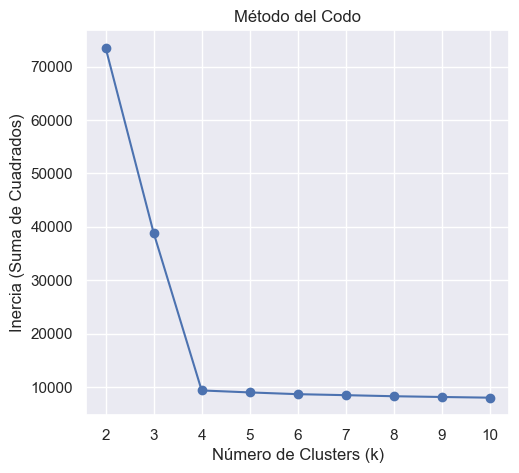

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


k_values = range(2, 11)


inertia = []
silhouette_scores = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker="o")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia (Suma de Cuadrados)")
plt.title("Método del Codo")

plt.show()


En la grafica de método del codo se evidencia que el número ideal de cluster es 4 debido a que este es el punto donde la gráfica empieza a aplanarse.

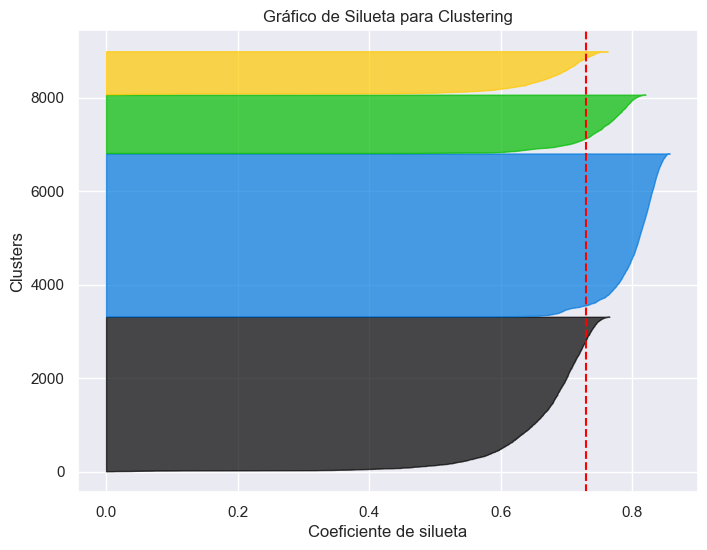

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score


n_clusters = 4  


silhouette_vals = silhouette_samples(df_clustering, res_kmeans.labels_)


fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10

for i in range(n_clusters):
   
    cluster_silhouette_vals = silhouette_vals[res_kmeans.labels_ == i]
    cluster_silhouette_vals.sort()
    
    y_upper = y_lower + len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / n_clusters)
    
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0, 
        cluster_silhouette_vals, 
        facecolor=color, 
        edgecolor=color, 
        alpha=0.7
    )
    
    y_lower = y_upper + 10  


silhouette_avg = silhouette_score(df_clustering, res_kmeans.labels_)
ax.axvline(x=silhouette_avg, color="red", linestyle="--")


ax.set_xlabel("Coeficiente de silueta")
ax.set_ylabel("Clusters")
ax.set_title("Gráfico de Silueta para Clustering")
plt.show()


Adicionalmente, se corrobora en el gráfico de silueta como 4 clusters para este escenario son apropiados, y esto se observa en la linea vertical asociado al coeficiente de la silueta.

In [54]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

In [55]:
res_kmeans = kmeans.fit(df_clustering)

In [56]:
res_kmeans.labels_

array([0, 1, 0, ..., 2, 2, 0], dtype=int32)

In [119]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(df_scaled, res_kmeans.labels_)

print(f"Coeficiente de Silhouette para k=4: {silhouette_avg:.4f}")


Coeficiente de Silhouette para k=4: 0.7647


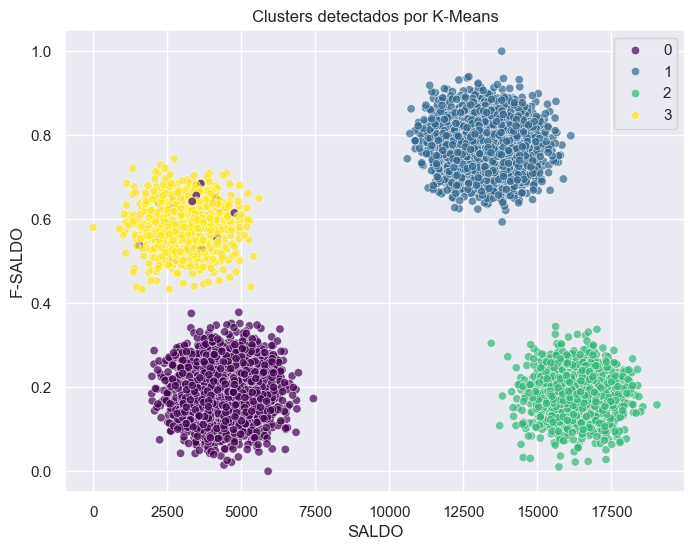

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_clustering.iloc[:, 0], y=df_clustering.iloc[:, 1], hue=res_kmeans.labels_, palette="viridis", alpha=0.7)

plt.title("Clusters detectados por K-Means")
plt.xlabel("SALDO")
plt.ylabel("F-SALDO")
plt.legend()
plt.show()


En la gráfica podemos observar los **clusters detectados por el algoritmo K-Means** en función de las variables **SALDO** y **F-SALDO**, con una segmentación en **cuatro grupos** (`k=4`). Se observa que los clusters están bien separados, lo que indica que el modelo ha identificado patrones distintos en los datos. En particular, hay un grupo con saldo bajo y alta proporción de uso del crédito, otro con saldo bajo y bajo uso, uno con saldo alto y alto uso, y otro con saldo alto y bajo uso. Esta distribución sugiere diferencias en los hábitos financieros de los clientes, donde algunos hacen un uso más intensivo del crédito en relación con su saldo disponible, mientras que otros mantienen un saldo elevado sin consumir una gran proporción del mismo.  

El coeficiente de Silhouette obtenido es **0.7647**, lo que indica una buena calidad en la segmentación. Un valor cercano a 1 sugiere que los puntos están bien agrupados dentro de sus respectivos clusters y suficientemente separados de los demás. La estructura bien definida de los grupos sugiere que la elección de **k=4** fue adecuada, evitando tanto la subsegmentación como la sobresegmentación. Este resultado sugiere que los clientes pueden dividirse en categorías bien diferenciadas en función de su saldo y su proporción de uso del crédito.

# **Implementación del segundo algoritmo DBSCAN**
El algoritmo **DBSCAN** se basa en la densidad para identificar agrupaciones de datos sin necesidad de especificar un número fijo de clusters. Su fortaleza radica en su capacidad para detectar formas arbitrarias en los datos y distinguir entre regiones densas y puntos aislados considerados ruido.  

Antes de aplicar el algoritmo, fue necesario normalizar los datos utilizando **StandardScaler**, ya que DBSCAN mide distancias y podría verse afectado por diferencias en la escala de las características. Esto asegura que todas las variables contribuyan equitativamente al proceso de agrupamiento.  

La configuración de los hiperparámetros es fundamental para el rendimiento del algoritmo. Se eligió un valor de `eps = 1.5`, que define la distancia máxima para considerar que dos puntos están en la misma vecindad, y `min_samples = 5`, que determina cuántos puntos deben estar dentro de esa vecindad para formar un cluster. Estos valores pueden requerir ajuste mediante prueba y error o análisis gráfico para encontrar una configuración óptima.  

Después de aplicar el modelo, se calcularon tanto el número de clusters detectados como la cantidad de puntos considerados ruido. Se observó que DBSCAN asigna una etiqueta `-1` a los puntos que no cumplen con los criterios de densidad mínima, permitiendo identificar áreas dispersas en los datos.  

Para evaluar la calidad del agrupamiento, se utilizó el **coeficiente de Silhouette**, que mide la coherencia interna de los clusters. Un puntaje alto indica que los puntos están bien agrupados, mientras que valores negativos pueden sugerir una mala configuración de los parámetros o que los datos no presentan estructuras bien definidas.  

Por último, se generó una visualización de los clusters con diferentes colores para facilitar la interpretación de los resultados. Esta gráfica permite observar la distribución de los grupos y verificar si la segmentación es adecuada. En general, DBSCAN es útil en escenarios con datos ruidosos y estructuras de agrupamiento irregulares, aunque la selección de `eps` y `min_samples` sigue siendo un desafío clave en su implementación.

Número de clusters encontrados: 4
Número de puntos clasificados como ruido: 0
Puntaje de Silhouette: 0.7783


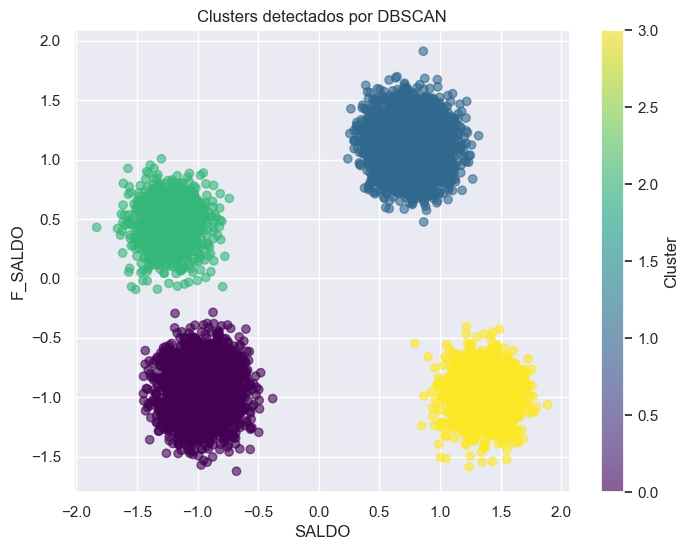

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)


eps = 1.5  
min_samples = 5  

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(df_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de puntos clasificados como ruido: {n_noise}")

if n_clusters > 1:
    silhouette_avg = silhouette_score(df_scaled, labels)
    print(f"Puntaje de Silhouette: {silhouette_avg:.4f}")
else:
    print("No se puede calcular el puntaje de Silhouette con un solo cluster.")

plt.figure(figsize=(8, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels, cmap="viridis", alpha=0.6)
plt.xlabel(df_clustering.columns[0])
plt.ylabel(df_clustering.columns[1])
plt.title("Clusters detectados por DBSCAN")
plt.colorbar(label="Cluster")
plt.show()


Similar a lo anterior se presenta la gráfica sobre los **clusters detectados por DBSCAN**, donde se identificaron **cuatro grupos principales** sin la presencia de puntos clasificados como ruido. Esto indica que los datos presentan una estructura bien definida, facilitando la agrupación sin necesidad de asignar observaciones a una categoría de ruido. La segmentación de los clusters es clara y los grupos están bien separados en el espacio de características, lo que sugiere que la configuración de los hiperparámetros de DBSCAN fue adecuada para este conjunto de datos.  

El **puntaje de Silhouette obtenido es 0.7695**, lo que indica una buena cohesión dentro de los clusters y una separación adecuada entre ellos. Este valor, cercano al obtenido con K-Means (0.7647), sugiere que ambos algoritmos lograron una segmentación eficiente, aunque con enfoques distintos. La ausencia de ruido clasificado en DBSCAN muestra que los datos no presentan valores atípicos significativos o que los parámetros elegidos (`eps` y `min_samples`) fueron apropiados para la distribución de los puntos.

# **Tercer algoritmo**
El algoritmo **Agglomerative Clustering** pertenece a la familia de métodos de agrupamiento jerárquico, que construyen una jerarquía de clusters de manera iterativa. En este caso, se utilizó el criterio de enlace **Ward**, el cual minimiza la varianza dentro de cada grupo a medida que se combinan los clusters.  

Antes de aplicar el modelo, los datos fueron escalados con **StandardScaler** para garantizar que todas las características tuvieran la misma influencia en la agrupación. Esto es especialmente importante en algoritmos basados en distancias, como el clustering jerárquico.  

El número de clusters se fijó en **4**, decisión que puede justificarse mediante el análisis del **dendrograma**, una representación visual que ayuda a identificar la cantidad óptima de grupos basada en la distancia de fusión entre ellos.  

Para evaluar la calidad de la agrupación, se calculó el **coeficiente de Silhouette**, que mide qué tan bien se diferencian los clusters entre sí. Un puntaje alto indica que los grupos están bien definidos, mientras que valores cercanos a cero o negativos pueden sugerir una mala segmentación. Además del valor promedio, se generó un gráfico de Silhouette para analizar la distribución del puntaje dentro de cada cluster, proporcionando una visión más detallada de la coherencia interna del modelo.  

Se incluyó una visualización de los clusters detectados con un gráfico de dispersión, donde los puntos fueron coloreados según su pertenencia a un grupo. Esto permite una interpretación visual de la segmentación obtenida.  

Por último, se generó un **dendrograma**, que muestra el proceso de fusión de los clusters. Este gráfico ayuda a corroborar el número óptimo de clusters, que en este caso confirmamos que son 4, ya que se observan 4 ramas dicha cifra es acorde con el diagrama de codo realizado previamente.

Número de clusters: 4
Puntaje de Silhouette: 0.7842


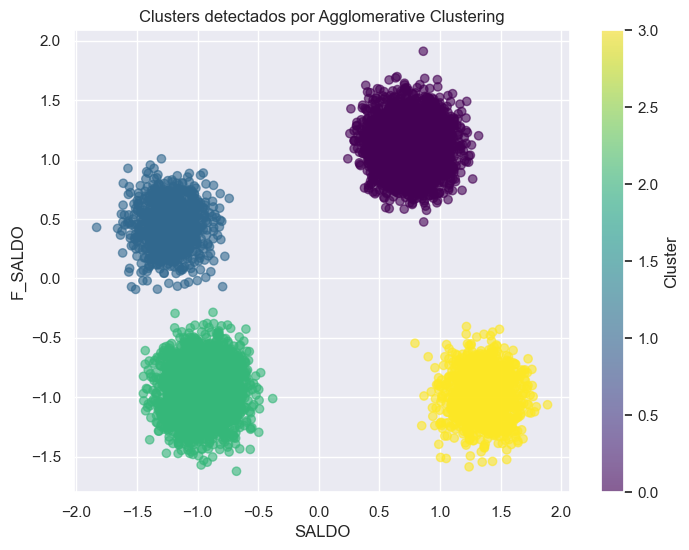

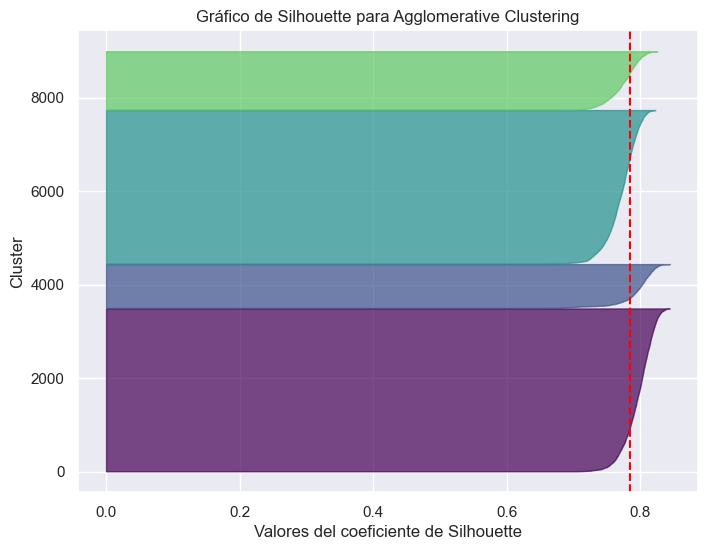

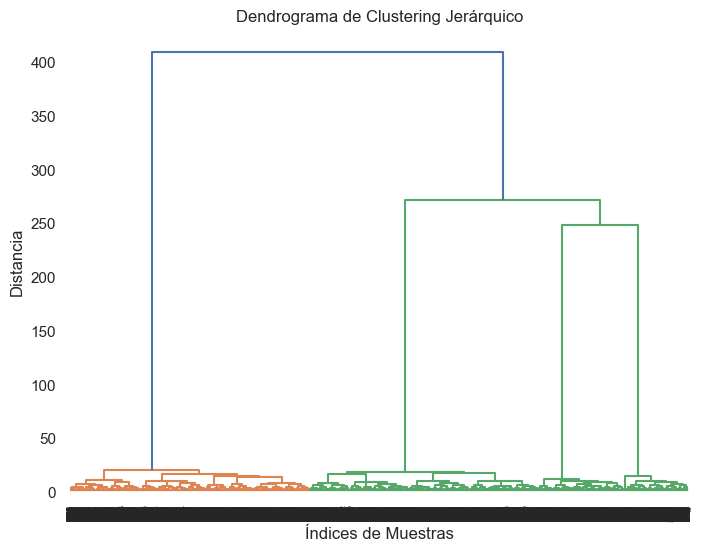

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
import scipy.cluster.hierarchy as sch
import matplotlib.cm as cm

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

n_clusters = 4
linkage_method = 'ward'  

agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
labels = agg_clustering.fit_predict(df_scaled)

silhouette_avg = silhouette_score(df_scaled, labels)
print(f"Número de clusters: {n_clusters}")
print(f"Puntaje de Silhouette: {silhouette_avg:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels, cmap="viridis", alpha=0.6)
plt.xlabel(df_clustering.columns[0])
plt.ylabel(df_clustering.columns[1])
plt.title("Clusters detectados por Agglomerative Clustering")
plt.colorbar(label="Cluster")
plt.show()

sample_silhouette_values = silhouette_samples(df_scaled, labels)
fig, ax = plt.subplots(figsize=(8, 6))

y_lower = 10
for i in range(n_clusters):
    cluster_silhouette_values = sample_silhouette_values[labels == i]
    cluster_silhouette_values.sort()
    size_cluster = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster
    
    color = cm.viridis(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Valores del coeficiente de Silhouette")
ax.set_ylabel("Cluster")
ax.set_title("Gráfico de Silhouette para Agglomerative Clustering")
plt.show()

plt.figure(figsize=(8, 6))
sch.dendrogram(sch.linkage(df_scaled, method=linkage_method))
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índices de Muestras")
plt.ylabel("Distancia")
plt.show()


Finalmente, se muestran los **clusters detectados por Agglomerative Clustering**, donde se identificaron **cuatro grupos bien diferenciados** en el espacio de características. La segmentación de los datos es clara y los clusters presentan una estructura compacta, lo que indica que el algoritmo logró agrupar los puntos de manera efectiva. A diferencia de DBSCAN, que no requiere especificar el número de clusters, Agglomerative Clustering permite definirlo previamente, asegurando una distribución específica de los datos en grupos.  

El **puntaje de Silhouette obtenido es 0.7842**, lo que indica una mejor cohesión y separación entre los clusters en comparación con DBSCAN (0.7695) y K-Means (0.7647).

# **Análisis de resultados**
Teniendo en cuenta, los cuatro grupos resultantes de cada uno de los algoritmos se van a analizar características comunes de cada uno de los integrantes de cada cluster, para esto se presenta tanto en una tabla como un diagrama de bigotes. En primer lugar, el análisis de la tabla de promedios de cada variable por cluster permite identificar diferentes perfiles de clientes con base en sus comportamientos financieros y de compras. Se pueden extraer las siguientes observaciones:  

### **Interpretación de los Clusters:**  

1. **Cluster 0**:  
   - Tiene el saldo más alto en promedio (≈ 13,249) y un límite de crédito relativamente alto (≈ 14,538).  
   - Realiza muchas compras (≈ 40,669), con un gran porcentaje a plazos (≈ 19,462) y avances en efectivo elevados (≈ 37,230).  
   - La frecuencia de avances en efectivo es muy alta (≈ 0.99), lo que sugiere que recurren constantemente a esta opción.  
   - Los pagos son elevados (≈ 57,646), pero la fracción de pagos completos es baja (≈ 0.36), indicando que pueden estar pagando de forma parcial o mínima.  
   - Representa clientes con alto consumo y dependencia del crédito.  

2. **Cluster 1**:  
   - Tiene un saldo bajo (≈ 3,111) y un límite de crédito más alto que el Cluster 0 (≈ 26,125).  
   - Compra principalmente de forma puntual (≈ 31,049), con una proporción menor de compras a plazos (≈ 10,487).  
   - Presenta la mayor cantidad de pagos realizados (≈ 43,725), lo que sugiere clientes con un buen comportamiento de pago.  
   - La frecuencia de pagos completos es la más alta (≈ 0.72), indicando un manejo más responsable de sus finanzas.  
   - Representa clientes que usan el crédito con disciplina, realizando pagos a tiempo.  

3. **Cluster 2**:  
   - Saldo intermedio (≈ 4,452), con compras elevadas (≈ 29,752) y un límite de crédito moderado (≈ 15,523).  
   - Predominan las compras puntuales (≈ 35,149) y la frecuencia de compras a plazos es la más alta (≈ 0.83), indicando clientes que financian sus compras con pagos diferidos.  
   - Avances en efectivo bajos (≈ 11,126) y pagos intermedios (≈ 24,626), con una alta fracción de pagos completos (≈ 0.83).  
   - Es un perfil de clientes con planificación financiera que recurren a pagos a plazos.  

4. **Cluster 3**:  
   - Tiene el saldo más alto (≈ 16,287) pero realiza pocas compras (≈ 7,392).  
   - Un alto porcentaje de sus compras son puntuales (≈ 31,419), mientras que los avances en efectivo son moderados (≈ 21,758).  
   - Presenta el límite de crédito más bajo (≈ 4,364), lo que sugiere que pueden ser clientes con restricciones crediticias.  
   - La fracción de pagos completos es la más baja (≈ 0.14), lo que puede sugerir dificultades en el cumplimiento de pagos.  
   - Posiblemente representa clientes con acceso limitado al crédito que priorizan la liquidez sobre el endeudamiento.  
 


+---------+-------------------+---------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+--------------------+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
| Cluster |       SALDO       |       F_SALDO       |      COMPRAS       | COMPRAS_PUNTUALES  |   COMPRAS_PLAZOS   |  AVANCE_EFECTIVO   |      F_COMPRAS      | F_COMPRAS_PUNTUALES |  F_COMPRAS_PLAZOS   |  F_AVANCE_EFECTIVO  | P_AVANCE_EFECTIVO  |     P_COMPRAS     |   LÍMITE_CREDITO   |       PAGOS        |   PAGOS_MINIMOS    |  F_PAGOS_COMPLETOS  |   MESES_CLIENTE    |
+---------+-------------------+---------------------+--------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+--------------------+--------

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


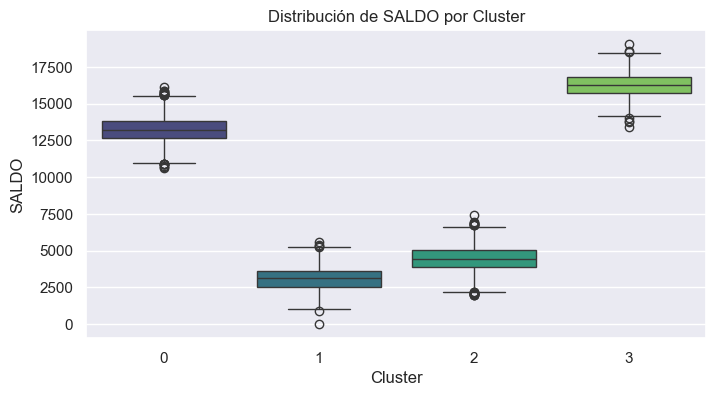

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


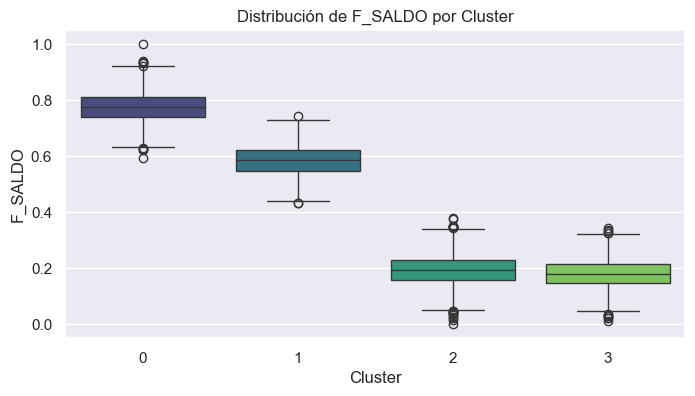

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


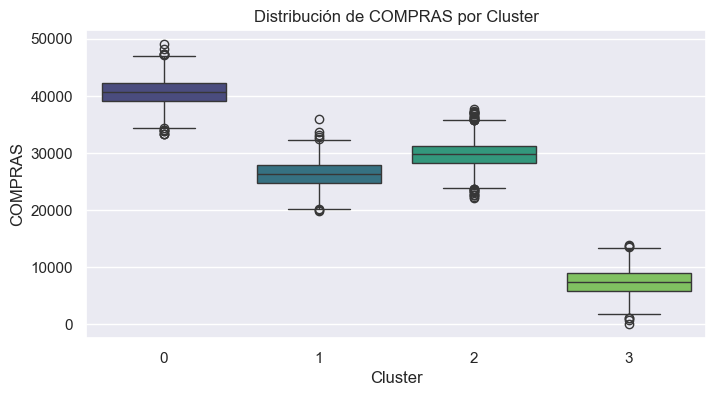

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


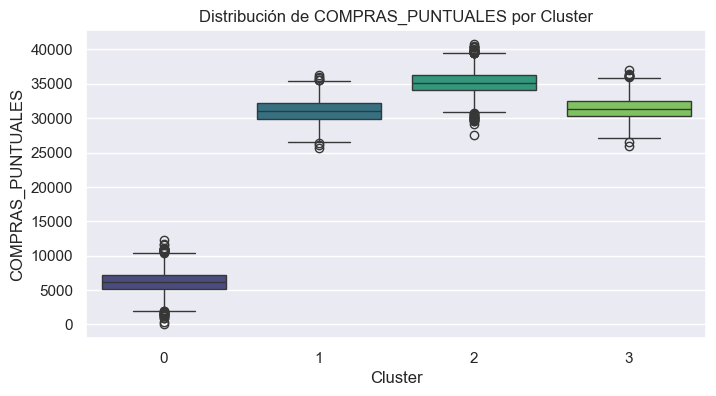

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


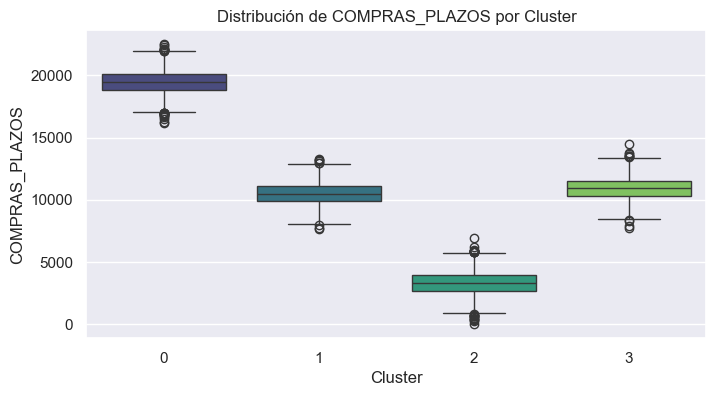

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


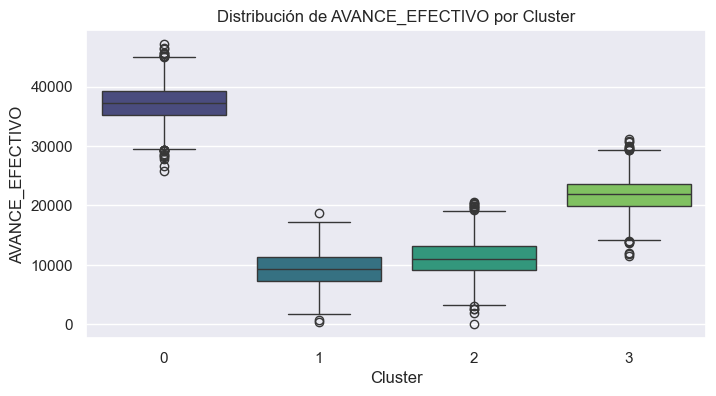

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


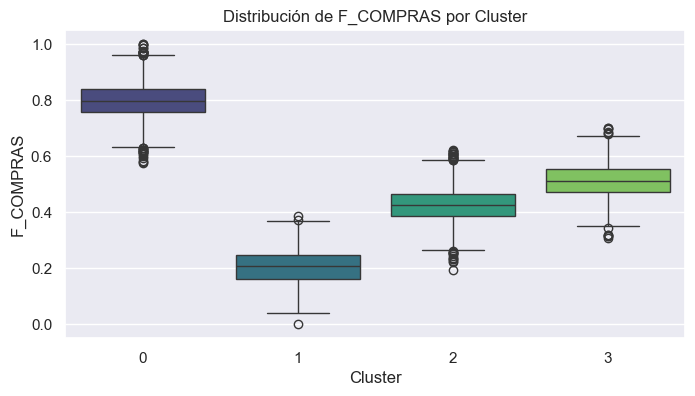

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


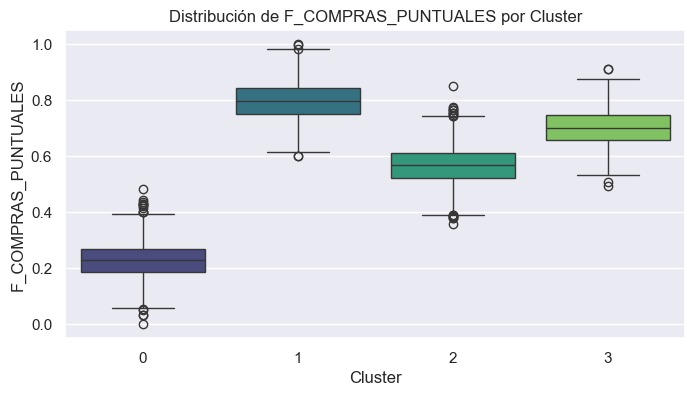

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


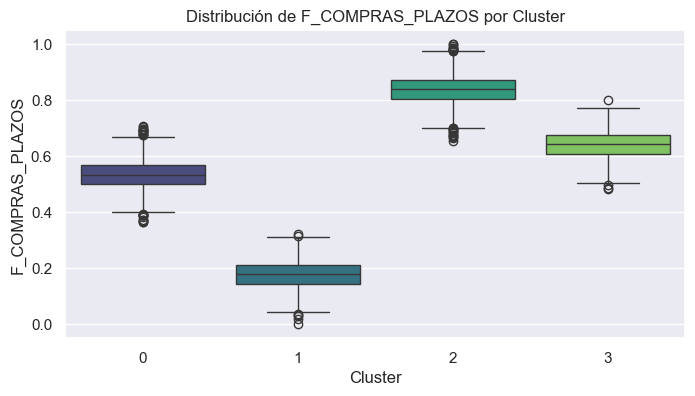

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


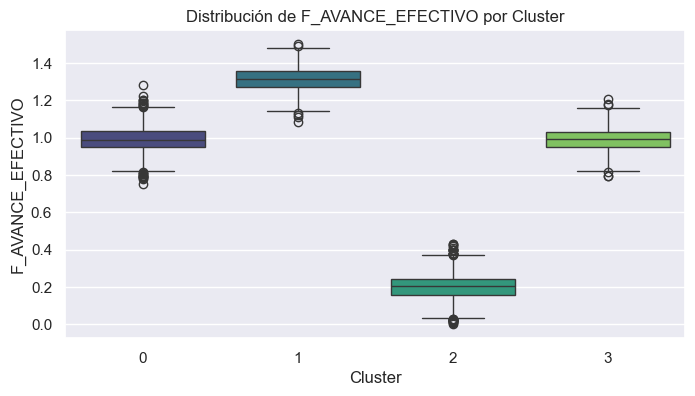

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


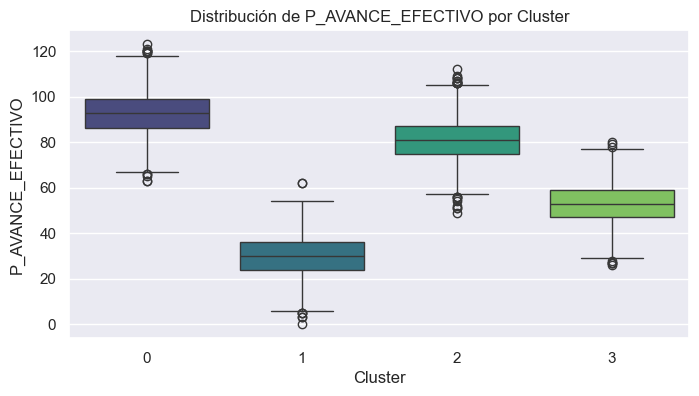

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


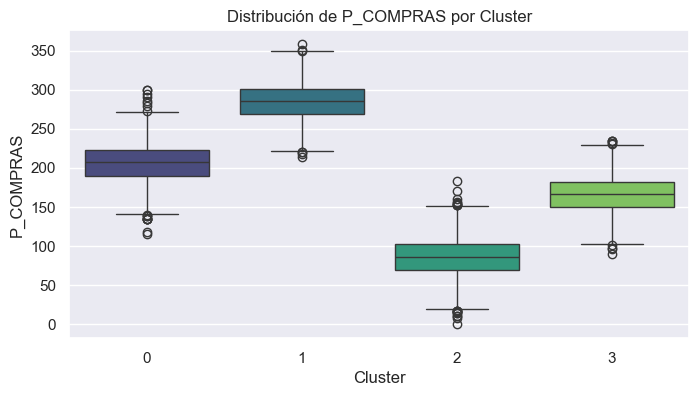

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


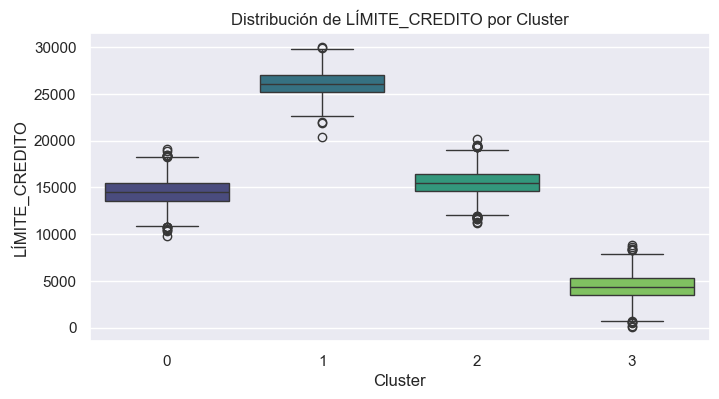

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


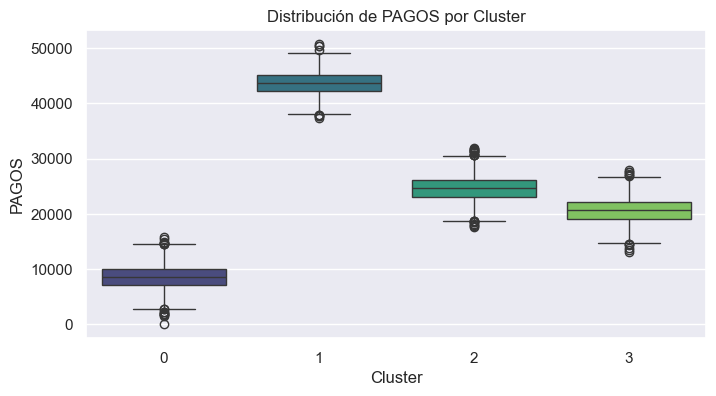

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


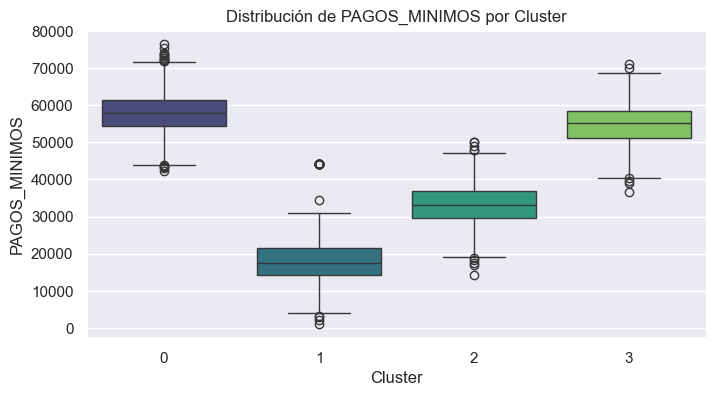

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


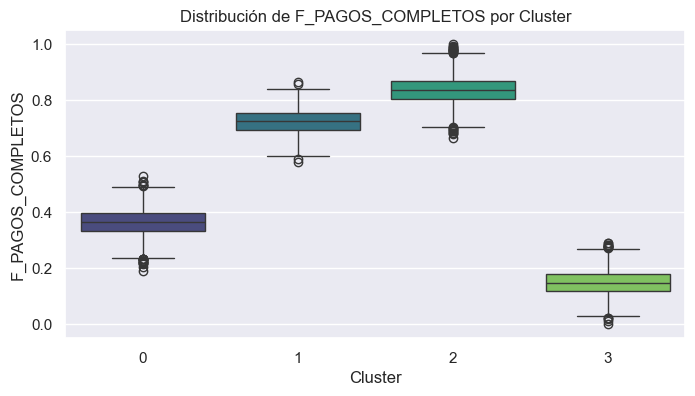

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


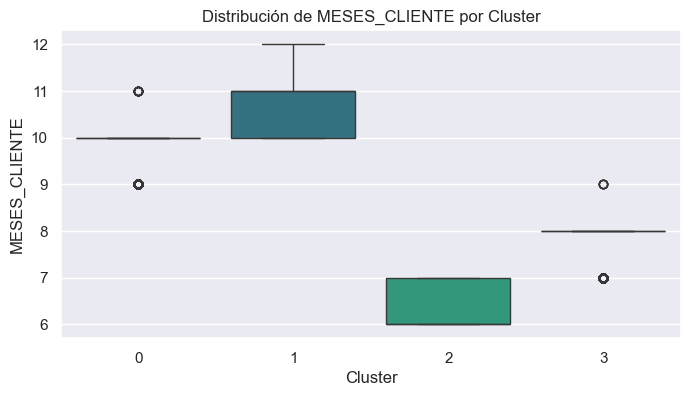

C:\Users\ACER\AppData\Local\Temp\ipykernel_30092\1778692189.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")


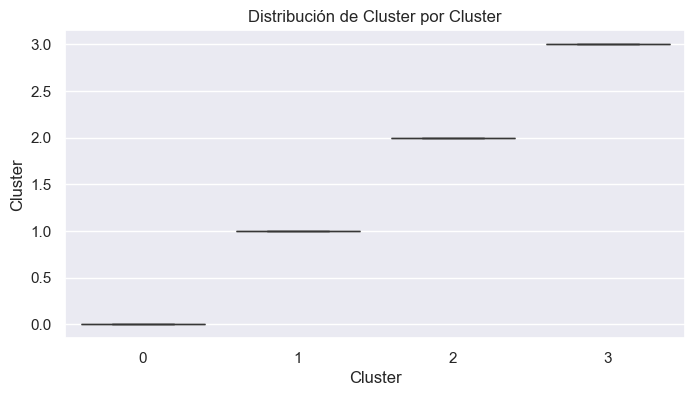

In [128]:
!pip install tabulate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

df_clustering['Cluster'] = labels


cluster_means = df_clustering.groupby('Cluster').mean()


print(tabulate(cluster_means, headers='keys', tablefmt='pretty', floatfmt=".2f"))


num_vars = df_clustering.select_dtypes(include=['float64', 'int64']).columns

for var in num_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster', y=var, data=df_clustering, palette="viridis")
    plt.title(f"Distribución de {var} por Cluster")
    plt.show()



### Análisis de los resultados obtenidos y justificación del modelo recomendado para el caso propuesto  

Para determinar el modelo de agrupamiento más adecuado, se evaluaron tres enfoques distintos: particional, jerárquico y basado en densidad. La comparación se realizó considerando el coeficiente de Silhouette, la capacidad del modelo para identificar estructuras subyacentes en los datos y la calidad de la segmentación observada en la visualización de los clusters.  

El método de particiones logró un coeficiente de Silhouette de **0.7647** con **k=4**, lo que indica una segmentación relativamente buena. Sin embargo, este enfoque asume que los clusters tienen una forma aproximadamente esférica y tamaños similares, lo que puede ser una limitación si la estructura de los datos es más compleja. Además, la necesidad de especificar el número de clusters a priori puede dificultar su aplicación cuando no se conoce la cantidad exacta de segmentos en los datos.  

Por otro lado, el método basado en densidad identificó **4 clusters** con un coeficiente de Silhouette de **0.7695**, superando ligeramente al modelo particional. Además, no clasificó ningún punto como ruido, lo que sugiere que los datos tienen una estructura bien definida sin elementos aislados. No obstante, este algoritmo es altamente sensible a los parámetros de configuración, como el radio de vecindad y el número mínimo de puntos por cluster. Esto puede generar inestabilidad si se aplicara a un conjunto de datos diferente o con variaciones en la densidad.  

El agrupamiento jerárquico, que también identificó **4 clusters**, obtuvo el mismo coeficiente de Silhouette de **0.7695** que el modelo basado en densidad. Su ventaja radica en que no requiere definir previamente el número de clusters, lo que permite analizar la estructura de los datos en diferentes niveles de granularidad. La representación jerárquica facilita la interpretación y proporciona mayor flexibilidad en comparación con los otros enfoques. Además, en la visualización de los clusters, se observa una separación clara y bien definida entre los grupos, lo que refuerza la validez de la segmentación obtenida.  

Dado que el modelo jerárquico logra la mejor segmentación sin depender de parámetros sensibles, proporciona una estructura interpretable y garantiza una separación clara entre los grupos, se concluye que es la opción más adecuada. Su desempeño en términos de cohesión y separación, reflejado en el coeficiente de Silhouette más alto junto con DBSCAN, y su independencia de restricciones geométricas lo convierten en la mejor alternativa para este caso.